In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load and preview the dataset
data = pd.read_csv('../data/raw_osteoporosis_data.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [3]:
# rename columns into camel_case
data.rename(columns={'Id': 'id', 'Age': 'age', 'Gender': 'gender', 'Hormonal Changes': 'hormonal_changes', 
                     'Family History':'family_history', 'Race/Ethnicity': 'race_ethnicity', 'Body Weight': 'body_weight',
                    'Calcium Intake': 'calcium_intake', 'Vitamin D Intake': 'vitamin_d_intake', 'Physical Activity': 'physical_activity',
                    'Smoking': 'smoking', 'Alcohol Consumption': 'alcohol_consumption', 'Medical Conditions': 'medical_conditions',
                    'Medications': 'medications', 'Prior Fractures': 'prior_fractures', 'Osteoporosis': 'osteoporosis'}, inplace=True)
data.head()

,id,age,gender,hormonal_changes,family_history,race_ethnicity,body_weight,calcium_intake,vitamin_d_intake,physical_activity,smoking,alcohol_consumption,medical_conditions,medications,prior_fractures,osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
# checking to see how many NA values in each column in dataset
data.isnull().sum()

id                       0
age                      0
gender                   0
hormonal_changes         0
family_history           0
race_ethnicity           0
body_weight              0
calcium_intake           0
vitamin_d_intake         0
physical_activity        0
smoking                  0
alcohol_consumption    988
medical_conditions     647
medications            985
prior_fractures          0
osteoporosis             0
dtype: int64

In [5]:
# fill NA values with 'None'
data['alcohol_consumption'] = data['alcohol_consumption'].fillna('None')
data['medical_conditions'] = data['medical_conditions'].fillna('None')
data['medications'] = data['medications'].fillna('None')

In [6]:
# drop 'id' column as it is irrelevant to our data analysis
data.drop('id', axis=1, inplace = True)
data.head()

,age,gender,hormonal_changes,family_history,race_ethnicity,body_weight,calcium_intake,vitamin_d_intake,physical_activity,smoking,alcohol_consumption,medical_conditions,medications,prior_fractures,osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [7]:
# get counts for each category in column
for column in data.select_dtypes(include = 'object').columns:
    print(data[column].value_counts())
    print("\n")

gender
Male      992
Female    966
Name: count, dtype: int64


hormonal_changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64


family_history
No     998
Yes    960
Name: count, dtype: int64


race_ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64


body_weight
Normal         1027
Underweight     931
Name: count, dtype: int64


calcium_intake
Low         1004
Adequate     954
Name: count, dtype: int64


vitamin_d_intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64


physical_activity
Active       1021
Sedentary     937
Name: count, dtype: int64


smoking
Yes    982
No     976
Name: count, dtype: int64


alcohol_consumption
None        988
Moderate    970
Name: count, dtype: int64


medical_conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64


medications
None               985
Corticosteroids    973
Name: count, dt

In [8]:
# distribution of numerical column age
data['age'].describe()

count    1958.000000
mean       39.101124
std        21.355424
min        18.000000
25%        21.000000
50%        32.000000
75%        53.000000
max        90.000000
Name: age, dtype: float64

ValueError: Invalid RGBA argument: '9ECAE1'

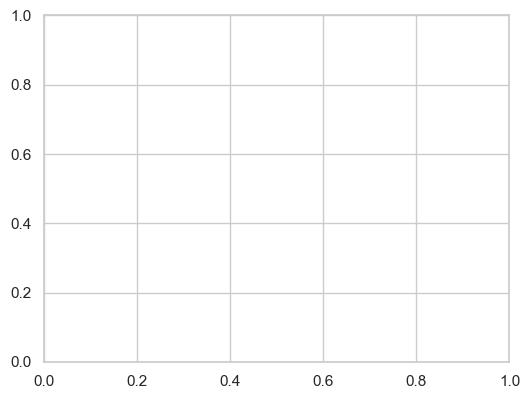

In [9]:
# univariate distribution for age column
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))
sns.histplot(data['age'], bins = 15, color = '9ECAE1', edgecolor = 'black', linewidth = 2.5)

plt.title('Distribution of Age', fontsize = 12, weight = 'bold')
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.axvline(data['Age'].mean(), color = 'red', linestyle = '--', linewidth = 2)

plt.show()

In [10]:
# age v osteoporosis table
print("Age vs Osteoporosis \n")
(data.groupby('age')['osteoporosis'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

Age vs Osteoporosis 



osteoporosis,0,1
age,,
18,86.8%,13.2%
19,90.5%,9.5%
20,89.0%,11.0%
21,88.9%,11.1%
22,84.8%,15.2%
...,...,...
86,nan%,100.0%
87,nan%,100.0%
88,nan%,100.0%


In [11]:
# family history vs osteoporosis table
print("Family History vs Osteoporosis \n")
(data.groupby('family_history')['osteoporosis'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

Family History vs Osteoporosis 



osteoporosis,0,1
family_history,,
No,49.9%,50.1%
Yes,50.1%,49.9%


In [12]:
# calcium intake vs osteoporosis table
print("Calcium Intake vs Osteoporosis \n")
(data.groupby('calcium_intake')['osteoporosis'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

Calcium Intake vs Osteoporosis 



osteoporosis,0,1
calcium_intake,,
Adequate,49.8%,50.2%
Low,50.2%,49.8%


In [13]:
# vitamin d intake vs osteoporosis table
print("Vitamin D Intake vs Osteoporosis \n")
(data.groupby('vitamin_d_intake')['osteoporosis'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

Vitamin D Intake vs Osteoporosis 



osteoporosis,0,1
vitamin_d_intake,,
Insufficient,50.9%,49.1%
Sufficient,49.2%,50.8%


In [14]:
# medications vs osteoporosis table
print("Medications vs Osteoporosis \n")
(data.groupby('medications')['osteoporosis'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

Medications vs Osteoporosis 



osteoporosis,0,1
medications,,
Corticosteroids,48.3%,51.7%
None,51.7%,48.3%


In [15]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
data['age'] = standard_scaler.fit_transform(data[['age']])

In [ ]:
from sklearn.preprocessing import LabelEncorder

colums_for_label_encoding = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in columns_for_label_encoding:
    data[                                            